In [66]:
import pymolpro
import pandas as pd

In [67]:
backend = 'local' 
project_name = 'FH51_methodtest'
parallel = 8

In [68]:
methods = {"HF": "hf",
"MP2": "mp2",
"MP3": "mp3",
"MP4": "mp4",
"PAPT2":"PAPT;MP2",
"PAPT3":"PAPT;MP3",
"PAPT4":"PAPT;MP4",
"CCSD":"CCSD",
"CCSD(T)":"CCSD(T)" }
bases = ['cc-pVDZ','cc-pVTZ']

In [69]:
db = pymolpro.database.load("GMTKN55_FH51")

In [70]:
small=db.subset(open_shell=False,max_electrons=40)
print(small)

GMTKN55 FH51 (closed shell only) (maximum number of electrons 40):

Molecules:
H2O: {'geometry': '           3\n  \n    O         -1.09989026     -0.36122310      0.00000000\n    H         -0.12964877     -0.31792312      0.00000000\n    H         -1.38294827      0.56782190      0.00000000\n', 'description': 'H2O'}
1-pentene: {'geometry': '          15\n  \n    C         -3.68308053      0.94452211     -0.01656012\n    H         -3.68590013     -0.15545023      0.01932632\n    H         -3.15545960      1.24410275     -0.93472391\n    H         -4.72649383      1.27817511     -0.10830711\n    C         -3.01404275      1.53769362      1.22534673\n    H         -3.04848053      2.63830850      1.18144679\n    H         -3.58173640      1.25027510      2.12610967\n    C         -1.54958284      1.09017006      1.38850510\n    H         -1.52589130     -0.01495244      1.41907116\n    H         -0.96721377      1.39104970      0.50204330\n    C         -0.89999612      1.63188771      2.

In [71]:
results = {}
for method in methods:
    results[method] = {}
    for basis in bases:
        results[method][basis] = pymolpro.database.run(small, methods[method], basis, location=project_name,
                                                       preamble= 'angstrom' ,backend=backend ,parallel=parallel)
        if results[method][basis].failed: print(method, basis, 'failed', results[method][basis].project_directory)
        
print(results)    

{'HF': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fefe1143730>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fefe119a4a0>}, 'MP2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7ff00bfd3940>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fefe11c3970>}, 'MP3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fefe11eeb60>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fefe11ef010>}, 'MP4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fefe11eebc0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fefe11eec20>}, 'PAPT2': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fefe11d4850>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fefe11ed930>}, 'PAPT3': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fefe11d49a0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fefe11d4760>}, 'PAPT4': {'cc-pVDZ': <pymolpro.database.Database object at 0x7fefe1039cc0>, 'cc-pVTZ': <pymolpro.database.Database object at 0x7fefe1039f60>}, 'CCSD':

In [72]:
extrapolate={}
for method in  methods:
    extrapolate[method]=pymolpro.database.basis_extrapolate                  (results[method].values(), results["HF"].values())[0]
print(extrapolate)

{'HF': <pymolpro.database.Database object at 0x7fefe11ee920>, 'MP2': <pymolpro.database.Database object at 0x7fefe11ee8f0>, 'MP3': <pymolpro.database.Database object at 0x7fefe11ee7d0>, 'MP4': <pymolpro.database.Database object at 0x7fefe11eea70>, 'PAPT2': <pymolpro.database.Database object at 0x7fefe11ecd30>, 'PAPT3': <pymolpro.database.Database object at 0x7fefe11ee2c0>, 'PAPT4': <pymolpro.database.Database object at 0x7fefe11ee800>, 'CCSD': <pymolpro.database.Database object at 0x7fefe11eead0>, 'CCSD(T)': <pymolpro.database.Database object at 0x7fefe11eeaa0>}


In [73]:
results_with_extrapolation = results
for method in results_with_extrapolation.keys():
    results_with_extrapolation[method]['cc-pV[23]Z'] = extrapolate[method]
results_with_extrapolation
results = results_with_extrapolation

pd.options.display.float_format = '{:,.2f}'.format
analyse=pymolpro.database.analyse([result['cc-pV[23]Z'] for result in results.values()],results['CCSD(T)']['cc-pV[23]Z'],unit='kJ/mol')
analyse['reaction statistics']

,HF/cc-pV[23]Z,MP2/cc-pV[23]Z,MP3/cc-pV[23]Z,MP4/cc-pV[23]Z,PAPT;MP2/cc-pV[23]Z,PAPT;MP3/cc-pV[23]Z,PAPT;MP4/cc-pV[23]Z,CCSD/cc-pV[23]Z,CCSD(T)/cc-pV[23]Z
MAD,3.48,5.11,4.95,2.95,2.78,2.59,0.70,1.04,0.00
MAXD,7.58,10.35,10.86,6.53,6.23,5.82,1.67,2.32,0.00
RMSD,4.31,6.75,6.87,4.14,3.82,3.56,1.03,1.38,0.00
MSD,2.34,3.17,-4.95,2.74,-2.78,-2.59,-0.67,-0.97,0.00
STDEVD,4.05,6.66,5.33,3.46,2.93,2.73,0.87,1.10,0.00


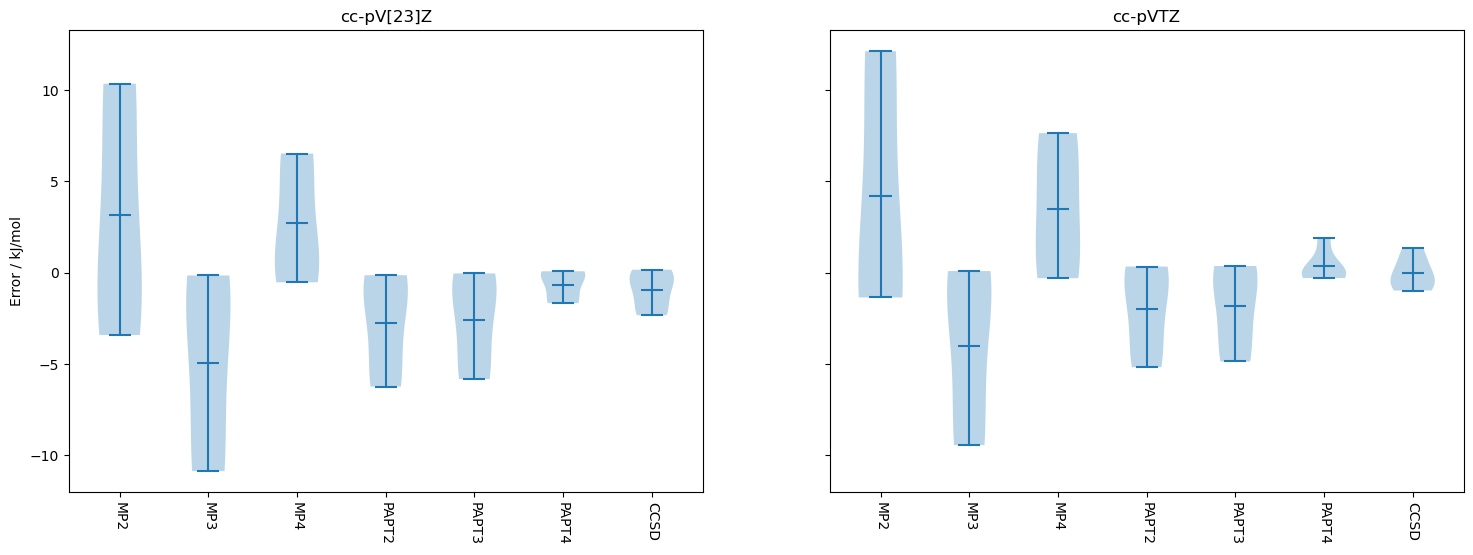

In [74]:
import matplotlib.pyplot as plt

methods_pruned = [method for method in methods if (method != 'HF') and (method != 'CCSD(T)')]
bases_pruned = ['cc-pV[23]Z', 'cc-pVTZ']
fig, panes = plt.subplots(nrows=1, ncols=len(bases_pruned), sharey=True, figsize=(18, 6))

for pane in range(len(bases_pruned)):
    data = []
    for method in methods_pruned:
        data.append(
            pymolpro.database.analyse(results[method][bases_pruned[pane]],
                                      results['CCSD(T)']['cc-pV[23]Z'],'kJ/mol')['reaction energy deviations'].to_numpy()[:, 0]
        )
    panes[pane].violinplot(data, showmeans=True, showextrema=True, vert=True, bw_method='silverman')
    panes[pane].set_xticks(range(1, len(methods_pruned) + 1), labels=methods_pruned, rotation=-90)
    panes[pane].set_title(bases_pruned[pane])
panes[0].set_ylabel('Error / kJ/mol')
plt.savefig(project_name + ".violin.pdf")
